# Descripción

- Es un método de pronóstico de series temporales basado en el suavizamiento exponencial.
- Fue desarrollado por Charles Holt y extendido por Peter Winters, por eso se llama Holt-Winters o Triple Exponential Smoothing.
- Se utiliza cuando una serie tiene tendencia y/o estacionalidad.

🔑 Idea principal:

Holt-Winters extiende el suavizamiento exponencial simple agregando componentes adicionales:

   𝑦^𝑡+ℎ=(𝑁𝑖𝑣𝑒𝑙_𝑡+ℎ⋅𝑇𝑒𝑛𝑑𝑒𝑛𝑐𝑖𝑎_𝑡)⋅𝐸𝑠𝑡𝑎𝑐𝑖𝑜𝑛𝑎𝑙𝑖𝑑𝑎𝑑_𝑡+ℎ

Donde la serie se descompone en:
- Nivel (𝐿_𝑡) → el valor base de la serie en el tiempo 𝑡.
- Tendencia (𝑇_𝑡) → la dirección (crecimiento o decrecimiento) de la serie.
- Estacionalidad (𝑆_𝑡) → los patrones repetitivos (diarios, mensuales, trimestrales, etc.).

⚙️ Tipos de Holt-Winters:

Aditivo:
- Se usa cuando la amplitud de la estacionalidad es constante en el tiempo.
- Ejemplo: ventas que suben y bajan siempre por la misma cantidad cada temporada.

Multiplicativo:

- Se usa cuando la estacionalidad aumenta o disminuye proporcionalmente al nivel de la serie.
- Ejemplo: ventas donde los picos en campañas de fin de año son cada vez mayores a medida que crece el negocio.

# Paquetes

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Dataset

In [127]:
link = "https://raw.githubusercontent.com/AlvaroM31/Forecasting_aplicado_python/refs/heads/main/Introducci%C3%B3n_T%C3%A9cnico/data.csv"
data = pd.read_csv(link,index_col=0,parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 137 entries, 2024-01-01 to 2024-05-16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ventas  137 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


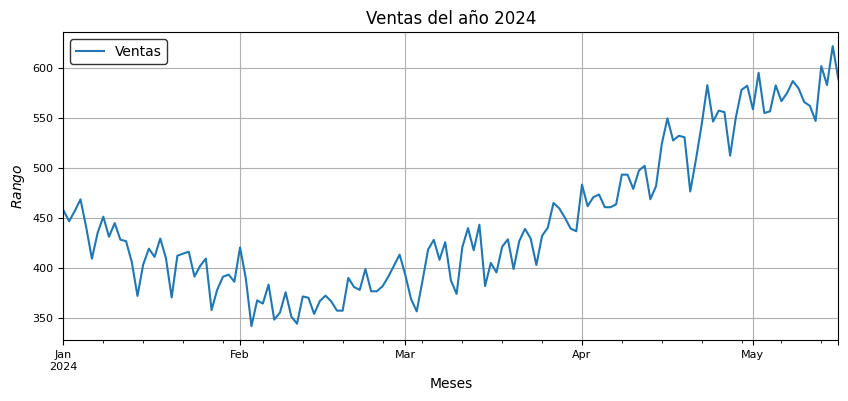

In [128]:
data.ventas.plot(figsize=(10,4), label='Ventas')
plt.legend(loc='upper left', fontsize=10, edgecolor='#000000')
plt.title('Ventas del año 2024', fontsize=12)
plt.xlabel('Meses', fontsize=10)
plt.ylabel('$Rango$', fontsize=10)
plt.grid(True)
plt.tick_params(axis='both', labelsize=8)
plt.show()

# Modelo Holt Winters

## Modelo simple

In [129]:
modelo = ExponentialSmoothing(data['ventas'],trend='add').fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [130]:
#Este es la serie original
data['ventas'].head()

,ventas
2024-01-01,457.450712
2024-01-02,446.426035
2024-01-03,456.715328
2024-01-04,468.345448
2024-01-05,440.487699


In [131]:
#Esto es lo que mi modelo ha entendido de mi serie
modelo.fittedvalues.head()

,0
2024-01-01,453.766017
2024-01-02,451.422537
2024-01-03,447.542678
2024-01-04,446.190795
2024-01-05,447.430095


Proyección del modelo Holt Winters (lo que ha entendido de la serie original)

In [132]:
modelo.forecast(7)

,0
2024-05-17,594.465896
2024-05-18,596.364830
2024-05-19,598.263765
2024-05-20,600.162700
2024-05-21,602.061635
2024-05-22,603.960570
2024-05-23,605.859505


Gráfico del modelo y el pronóstico de 7 periodos

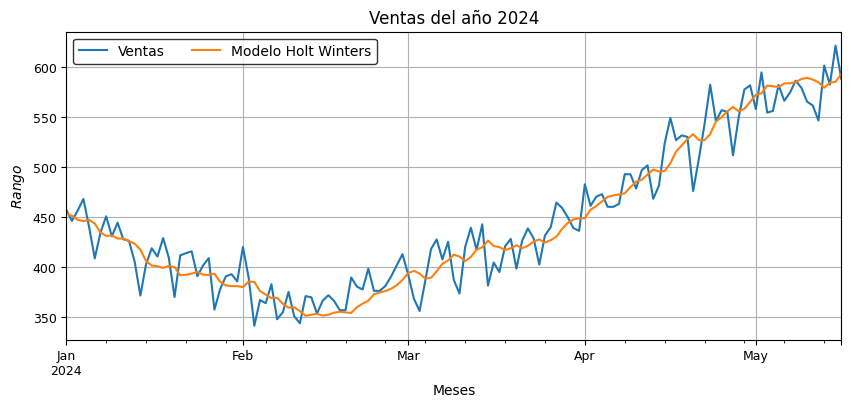

In [133]:
data.ventas.plot(figsize=(10,4), label='Ventas')
modelo.fittedvalues.plot(label='Modelo Holt Winters')
plt.legend(loc='upper left', fontsize=10, ncol=2, edgecolor='#000000')
plt.title('Ventas del año 2024', fontsize=12)
plt.xlabel('Meses', fontsize=10)
plt.ylabel('$Rango$', fontsize=10)
plt.grid(True)
plt.tick_params(axis='both', labelsize=9)
plt.show()

## Modelo agregando estacionalidad

In [134]:
#Seasonal es estacionalidad
modelo = ExponentialSmoothing(data['ventas'],trend='add',seasonal='add',seasonal_periods=7).fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [135]:
modelo.fittedvalues.head()

,0
2024-01-01,456.615206
2024-01-02,460.850848
2024-01-03,447.744203
2024-01-04,453.356323
2024-01-05,445.922995


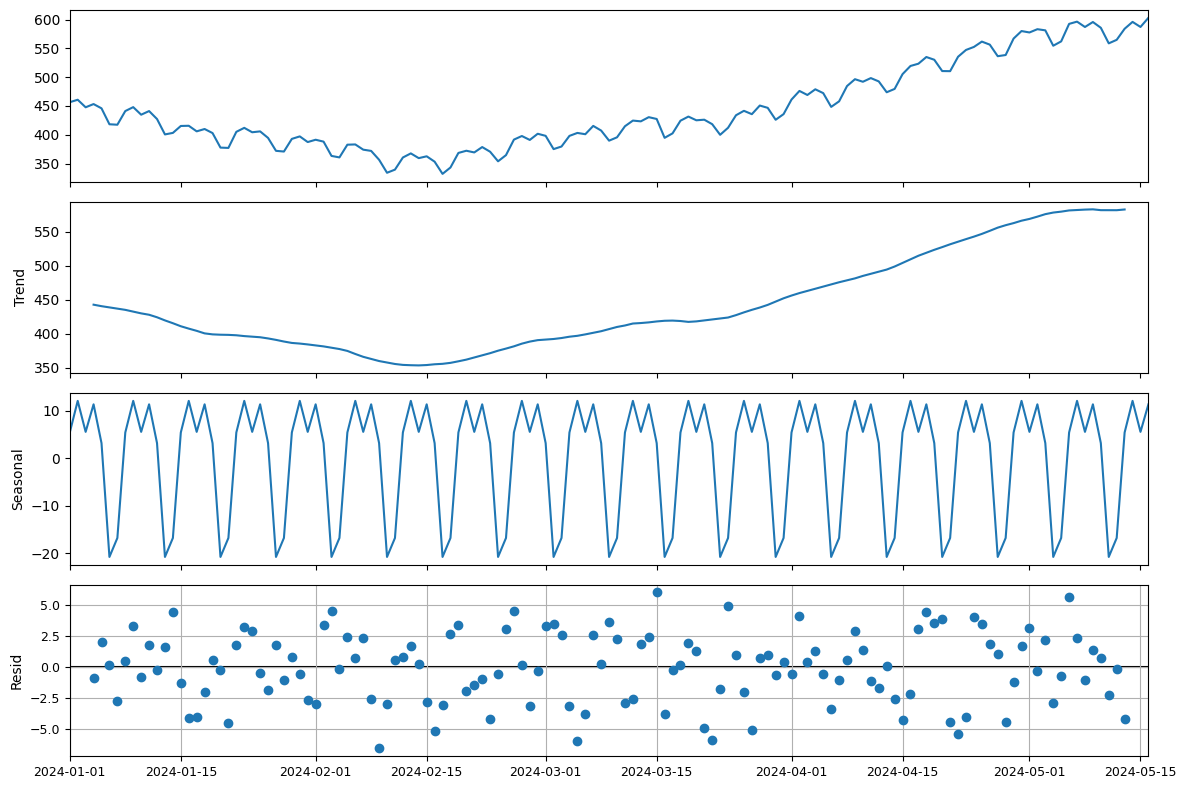

In [136]:
from statsmodels.tsa.seasonal import seasonal_decompose
# descomposición sobre la serie original o suavizada
descomposición = seasonal_decompose(modelo.fittedvalues,model='additive',period=7)
fig=descomposición.plot()
fig.set_size_inches(12,8)
plt.tight_layout()
plt.tick_params(axis='both',labelsize=9)
plt.grid(True)
plt.show()

In [137]:
# Proyección
modelo.forecast(7)

,0
2024-05-17,593.271659
2024-05-18,570.907966
2024-05-19,576.522290
2024-05-20,600.413891
2024-05-21,608.704488
2024-05-22,603.399661
2024-05-23,611.424401


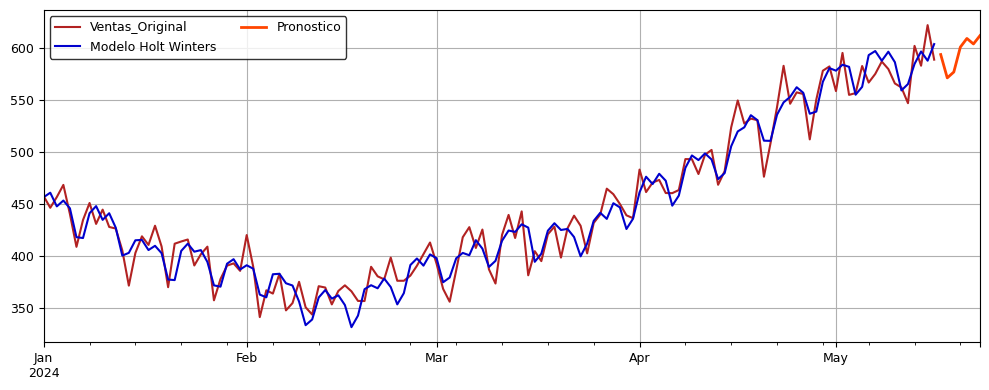

In [138]:
data.ventas.plot(figsize=(10,4), label='Ventas_Original', color= '#B22222',lw=1.5)
modelo.fittedvalues.plot(label='Modelo Holt Winters',color='#0000CD',lw=1.5)
modelo.forecast(7).plot(label='Pronostico', color ='#FF4500',lw=2)
plt.legend(loc='upper left', fontsize=9,ncol=2,edgecolor='#000000')
plt.tick_params(axis='both',labelsize=9)
plt.tight_layout()
plt.grid(True)
plt.savefig('Modelo_Holt_Winters.png',dpi=500)
plt.show()

Otra forma de representar este grafico (el problema claramente es que el eje x no es de meses)

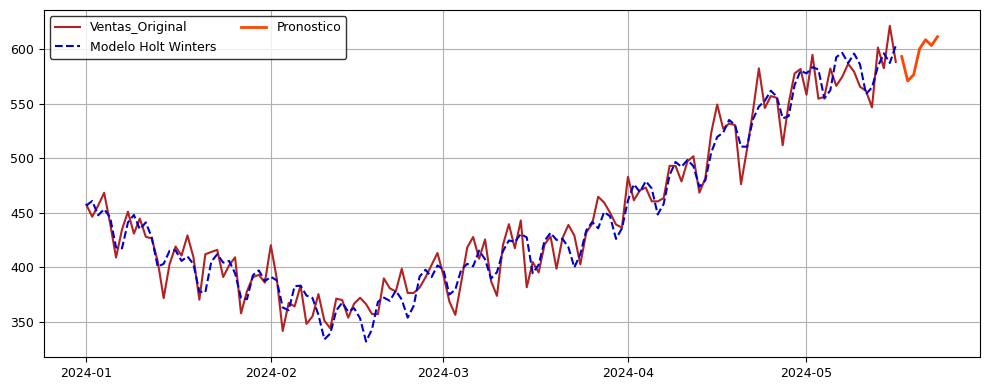

In [139]:
plt.figure(figsize=(10,4))
plt.plot(data['ventas'], label='Ventas_Original', color= '#B22222',lw=1.5)
plt.plot(modelo.fittedvalues,label='Modelo Holt Winters',color='#0000CD',lw=1.5,linestyle='--')
plt.plot(modelo.forecast(7),label='Pronostico', color ='#FF4500',lw=2)
plt.legend(loc='upper left', fontsize=9,ncol=2,edgecolor='#000000')
plt.tick_params(axis='both',labelsize=9)
plt.tight_layout()
plt.grid(True)
plt.savefig('Modelo_Holt_Winters.png',dpi=500)
plt.show()

## Creación de una columna en data del modelo

In [140]:
modelo_hw = ExponentialSmoothing(
    data['ventas'],
    trend='add',
    seasonal='add',
    seasonal_periods=7
).fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [141]:
#Agrego el modelo en una columna de data
data['hw_modelo1'] = modelo_hw.fittedvalues

Usando el modelo con un forecast de 21 periodos

In [142]:
forecast = modelo_hw.forecast(21)

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


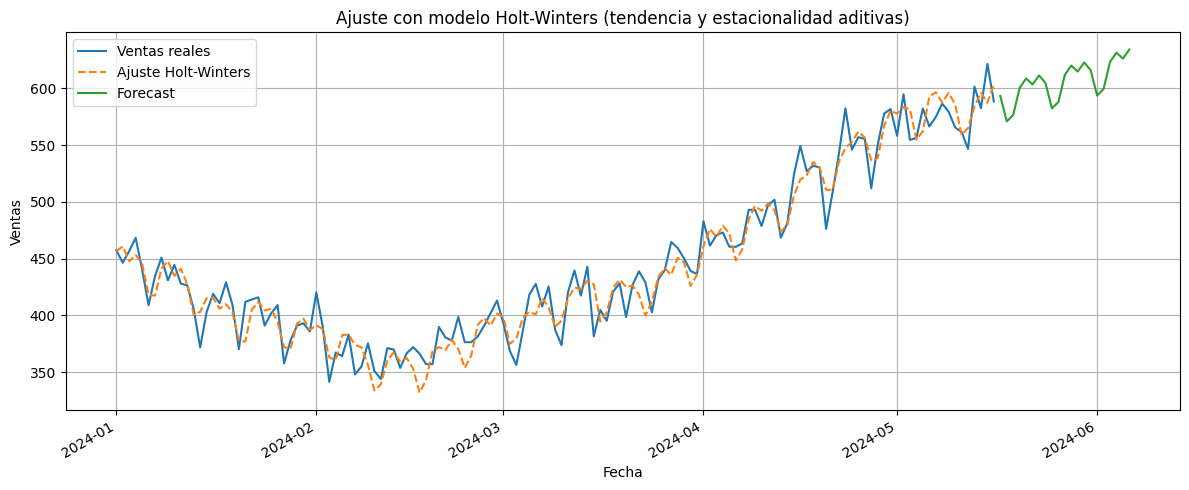

In [143]:
# Graficar resultados
plt.figure(figsize=(12, 5))
plt.plot(data['ventas'], label='Ventas reales')
plt.plot(data['hw_modelo1'], label='Ajuste Holt-Winters', linestyle='--')
forecast.plot(label='Forecast')
plt.title('Ajuste con modelo Holt-Winters (tendencia y estacionalidad aditivas)')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Componentes multiplicativos

In [144]:
# Tipos de datas que incluyen en seaborn
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [145]:
# Cargar la data flights (AirPassengers)
flights = sns.load_dataset('flights')

Se nota en la grafica que la tendencia es multiplicativa:
- multiplicativo crece geometricamente
- aditiva crece sumatoriamente

Los picos son cada vez diferentes es una caracteristica de que la estacionalidad sea multiplicativa

<Axes: >

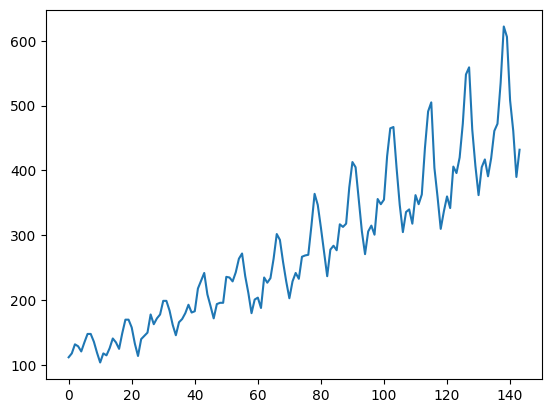

In [146]:
flights['passengers'].plot()

###Limpieza de datos para tener un índice de tipo to_datetime: (Condiciones para realizar el modelo HoltWinters)

In [147]:
# Breve observación a la data de la serie
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


- El parámetro format='%b' le dice a pandas que el texto está en abreviatura de mes en inglés de 3 letras (Jan, Feb, Mar, …, Dec).
- Si en vez de abreviaturas completas (January, February), se usaría format='%B'.
- 👉 Como no das año ni día, pandas asume un valor por defecto: 1 de enero de 1900.

In [148]:
# Convertir nombre del mes a número
flights['month_num'] = pd.to_datetime(flights['month'], format='%b').dt.month

Solo se puede usar esto en ingles, asi que español mejor debería realizar lo siguiente

meses = {
    "Ene": 1,
    "Feb": 2,
    "Mar": 3,
    "Abr": 4,
    "May": 5,
    "Jun": 6,
    "Jul": 7,
    "Ago": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dic": 12
}

flights["month_num"] = flights["month"].replace(meses)

In [149]:
# Crear columna de fecha
flights['date'] = pd.to_datetime(dict(year=flights.year,month=flights['month_num'], day=1))

In [150]:
pd.to_datetime(dict(year=flights.year,month=flights['month_num'], day=1)).head()

,0
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01


Otra forma de realizarlo

- pd.to_datetime({"year": flights["year"],
                "month": flights["month_num"],
                "day": 1})

Convirtiendo date en indice

In [151]:
flights.set_index('date',inplace=True)
ts=flights['passengers']

In [152]:
ts.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Creación del modelo ExponentialSmoothing (HoltWinters)

In [153]:
from ast import mod
# En este caso como observamos la gráfica usaremos el una tendencia mult y estacionalidad = mult
# Usalmente cuando es mensual se usa una estacionalidad de 12 periodos
model = ExponentialSmoothing(ts, trend='mul', seasonal='mul',seasonal_periods=12)
# model es la configuración del modelo (todavía sin entrenar).
# fit es el modelo entrenado, que ya ajustó los parámetros a los datos y que luego sirve para predecir
fit=model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [154]:
# fittedvalues sirve para plasmar el modelo entrenado en la serie de tiempo dada
fitted = fit.fittedvalues
# Forecast de los siguientes 12 periodos
forecast = fit.forecast(12)

Grafico

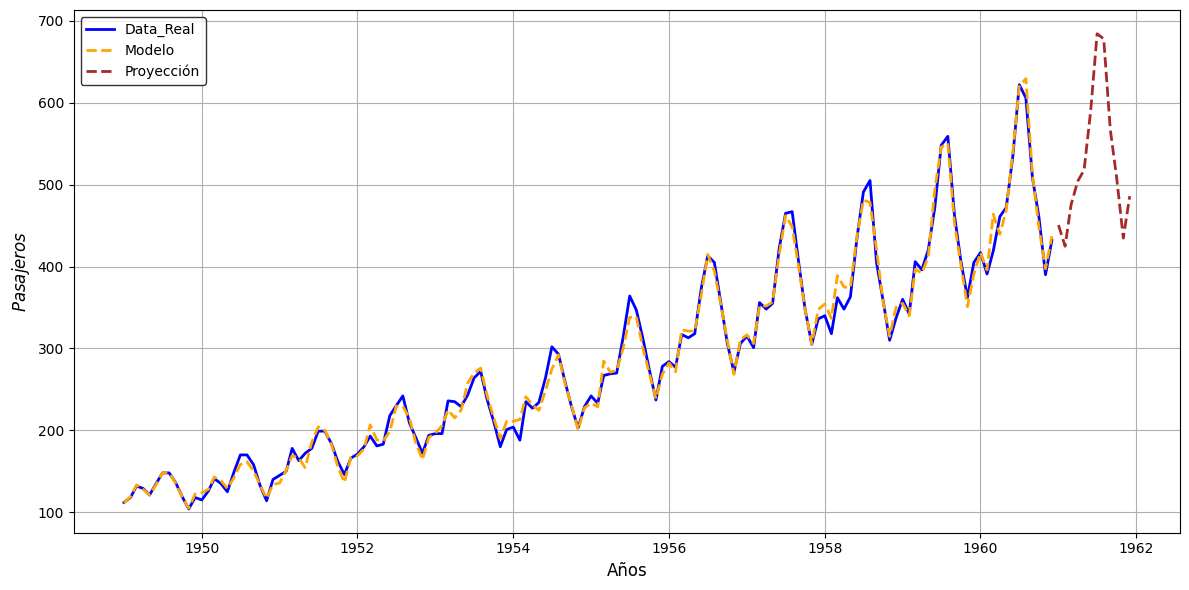

In [155]:
plt.figure(figsize=(12,6))
plt.plot(ts,label='Data_Real',lw=2,color='#0000FF')
plt.plot(fitted,'--',label='Modelo',color='#FFA500',lw=2,ms=2)
plt.plot(forecast,'--',label='Proyección',color='#A52A2A',lw=2,ms=2)
plt.legend(loc='upper left', fontsize=10, edgecolor='#000000')
plt.xlabel('Años',fontsize=12)
plt.ylabel('$Pasajeros$',fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.tight_layout()
plt.grid(True)
plt.show()

# Precisión de los modelos (no simplemente basta con observar si es aditivo o multiplicativo con)

## Métricas de Precisión en Series Temporales

A continuación se describen las principales métricas utilizadas para evaluar la precisión de los modelos de series temporales, junto con sus fórmulas matemáticas e interpretación.

---

### 1. MAE (Mean Absolute Error)

**Fórmula:**

$$
\text{MAE} = \frac{1}{n} \sum_{t=1}^{n} \left| y_t - \hat{y}_t \right|
$$

Donde:  
- $ y_t $ es el valor real en el tiempo $ t $.
- $ \hat{y}_t $ es el valor ajustado (o predicho) por el modelo en el tiempo $ t $.
- $ n $ es el número total de observaciones.

**Interpretación:**  
El MAE mide el error promedio absoluto entre las observaciones reales y las estimadas por el modelo. Un valor más bajo indica un mejor ajuste.

---

### 2. MSE (Mean Squared Error)

**Fórmula:**

$$
\text{MSE} = \frac{1}{n} \sum_{t=1}^{n} (y_t - \hat{y}_t)^2
$$

**Interpretación:**  
El MSE penaliza los errores grandes debido a la elevación al cuadrado. Un valor menor indica un modelo más preciso, pero su interpretación directa depende de la escala de los datos.
MSE se parece a la varianza del error

---

### 3. MAPE (Mean Absolute Percentage Error)

**Fórmula:**

$$
\text{MAPE} = \frac{100\%}{n} \sum_{t=1}^{n} \left| \frac{y_t - \hat{y}_t}{y_t} \right|
$$

**Interpretación:**  
El MAPE expresa el error como un porcentaje del valor real, lo que facilita la comparación entre diferentes series. Un MAPE bajo indica alta precisión relativa del modelo.

---

### ¿Cómo interpretar las métricas?

- **MAE bajo:** El error promedio absoluto es pequeño.
- **MSE bajo:** El modelo comete pocos errores grandes.
- **MAPE bajo:** El error promedio relativo es bajo.

Estas métricas permiten comparar distintos modelos para seleccionar el que mejor predice tus datos.

Nota: La métrica que más se valora es tener un MSE bajo, porque se puede aceptar tener un MAE no tan bajo, pero no errores grandes respecto al original (variaria mucho la predicción del real y el análisis del investigador/trabajador)

In [156]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [157]:
# Calcular las métricas
mae = mean_absolute_error(ts,fitted)
mse = mean_squared_error(ts,fitted)
mape = mean_absolute_percentage_error(ts,fitted)

print('Las metricas de error son las siguientes')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAPE: {mape:.2%}')

Las metricas de error son las siguientes
MAE: 7.50
MSE: 109.76
MAPE: 2.78%


📌 1. MAE (Mean Absolute Error) = 7.50

- Es el error absoluto medio.
- En promedio, el modelo se equivoca 7.5 unidades respecto al valor real.
- Se interpreta en las mismas unidades que tu serie (ejemplo: si tu serie son ventas, serían 7.5 ventas).

- 👉 Cuanto más pequeño, mejor.

📌 2. MSE (Mean Squared Error) = 109.76

- Es el error cuadrático medio.
- Eleva los errores al cuadrado antes de promediarlos → penaliza más fuerte los errores grandes.
- También está en unidades al cuadrado (por eso no es tan intuitivo como el MAE).
- 👉 Útil para comparar modelos, pero menos directo para interpretar.

📌 3. MAPE (Mean Absolute Percentage Error) = 2.78%

- Es el error porcentual absoluto medio.
- Significa que, en promedio, el modelo se equivoca un 2.78% respecto al valor real.
- Es una de las métricas más interpretables porque está en porcentaje.

En este caso, 2.78% → el modelo está ajustando muy bien 🎯.